<a href="https://colab.research.google.com/github/fokdogfok1/Proyecto_Gompertz_Avance2/blob/main/Versi%C3%B3n_Est%C3%A1tica_para_GitHub_Proyecto_Gompertz_Avance2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Paso 2: Importar las librerías
import numpy as np  # Para cálculos numéricos (arreglos, etc.)
from scipy.integrate import solve_ivp  # El solucionador de EDOs
import matplotlib.pyplot as plt  # Para crear los gráficos
from ipywidgets import interact, FloatSlider, Layout # Para los controles interactivos

print("Librerías importadas correctamente!")

Librerías importadas correctamente!


In [3]:
# Paso 3: Definir el modelo matemático (la EDO)
def gompertz_model(t, N, r, K):
    """
    Define la Ecuación Diferencial Ordinaria del modelo de Gompertz.
    t: tiempo (requerido por solve_ivp, aunque no se usa explícitamente en la fórmula)
    N: población actual
    r: tasa de crecimiento intrínseco
    K: capacidad de carga (límite máximo)
    """
    # Condición para evitar errores matemáticos si N o K son cero o negativos
    if N <= 0 or K <= 0:
        return 0

    # El corazón del modelo. Se añade un valor muy pequeño (epsilon) para
    # evitar errores de log(infinito) o log(0) si N es extremadamente pequeño.
    epsilon = 1e-9
    return r * N * np.log(K / (N + epsilon))

In [4]:
# Paso 4: Función para simular y graficar los 3 escenarios
def plot_gompertz_scenarios(
    # Parámetros Escenario 1: Levadura
    r1, K1, N01,
    # Parámetros Escenario 2: Resfriado
    r2, K2, N02,
    # Parámetros Escenario 3: Bacteria en Carne
    r3, K3, N03):

    # --- Configuración General ---
    t_span = [0, 30]  # Simular por 30 unidades de tiempo (días/horas)
    t_eval = np.linspace(t_span[0], t_span[1], 200) # Puntos para dibujar la curva

    # --- 1. Resolver la EDO para el Escenario de Levadura ---
    sol1 = solve_ivp(gompertz_model, t_span, [N01], args=(r1, K1), dense_output=True, t_eval=t_eval)

    # --- 2. Resolver la EDO para el Escenario de Resfriado ---
    sol2 = solve_ivp(gompertz_model, t_span, [N02], args=(r2, K2), dense_output=True, t_eval=t_eval)

    # --- 3. Resolver la EDO para el Escenario de Bacteria en Carne ---
    sol3 = solve_ivp(gompertz_model, t_span, [N03], args=(r3, K3), dense_output=True, t_eval=t_eval)

    # --- Creación del Gráfico ---
    plt.style.use('seaborn-v0_8-whitegrid')
    # Usamos 3 subplots porque las escalas de población (eje Y) son muy diferentes.
    # Esto evita que una curva se vea plana.
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))
    fig.suptitle('Simulación Interactiva del Modelo de Crecimiento de Gompertz', fontsize=16)

    # Gráfico 1: Levadura
    ax1.plot(sol1.t, sol1.y[0], label=f'r={r1}, K={K1:.1e}, N₀={N01:.1e}', color='blue')
    ax1.set_title('Escenario 1: Levadura en Fermentador')
    ax1.set_xlabel('Tiempo (horas)')
    ax1.set_ylabel('Población (células/ml)')
    ax1.legend()
    ax1.grid(True)

    # Gráfico 2: Resfriado
    ax2.plot(sol2.t, sol2.y[0], label=f'r={r2}, K={K2}, N₀={N02}', color='green')
    ax2.set_title('Escenario 2: Propagación de Resfriado')
    ax2.set_xlabel('Tiempo (días)')
    ax2.set_ylabel('Personas Contagiadas')
    ax2.legend()
    ax2.grid(True)

    # Gráfico 3: Bacteria en Carne
    ax3.plot(sol3.t, sol3.y[0], label=f'r={r3}, K={K3:.1e}, N₀={N03}', color='red')
    ax3.set_title('Escenario 3: Bacteria en Carne')
    ax3.set_xlabel('Tiempo (días)')
    ax3.set_ylabel('Población (UFC/cm²)')
    ax3.legend()
    ax3.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para que el título no se solape
    plt.show()

In [5]:
# Paso 5: Lanzar la interfaz interactiva
# Definimos los valores iniciales, mínimos, máximos y el paso para cada slider.
# Estos valores vienen del "Avance #1".

interact(plot_gompertz_scenarios,
         # Sliders Escenario 1
         r1=FloatSlider(value=0.5, min=0.1, max=1.0, step=0.05, description='r (Levadura)'),
         K1=FloatSlider(value=1.2e7, min=1e6, max=5e7, step=1e6, description='K (Levadura)', layout=Layout(width='500px'), readout_format='.1e'),
         N01=FloatSlider(value=5e4, min=1e3, max=1e6, step=1e3, description='N₀ (Levadura)', layout=Layout(width='500px'), readout_format='.1e'),
         # Sliders Escenario 2
         r2=FloatSlider(value=0.25, min=0.1, max=1.0, step=0.05, description='r (Resfriado)'),
         K2=FloatSlider(value=60, min=10, max=200, step=5, description='K (Resfriado)'),
         N02=FloatSlider(value=1, min=1, max=20, step=1, description='N₀ (Resfriado)'),
         # Sliders Escenario 3
         r3=FloatSlider(value=0.15, min=0.05, max=0.5, step=0.01, description='r (Bacteria)'),
         K3=FloatSlider(value=1e8, min=1e7, max=5e8, step=1e7, description='K (Bacteria)', layout=Layout(width='500px'), readout_format='.1e'),
         N03=FloatSlider(value=10, min=1, max=1000, step=10, description='N₀ (Bacteria)')
);

interactive(children=(FloatSlider(value=0.5, description='r (Levadura)', max=1.0, min=0.1, step=0.05), FloatSl…

/tmp/ipython-input-1560501914.py:54: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Liberation Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para que el título no se solape
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


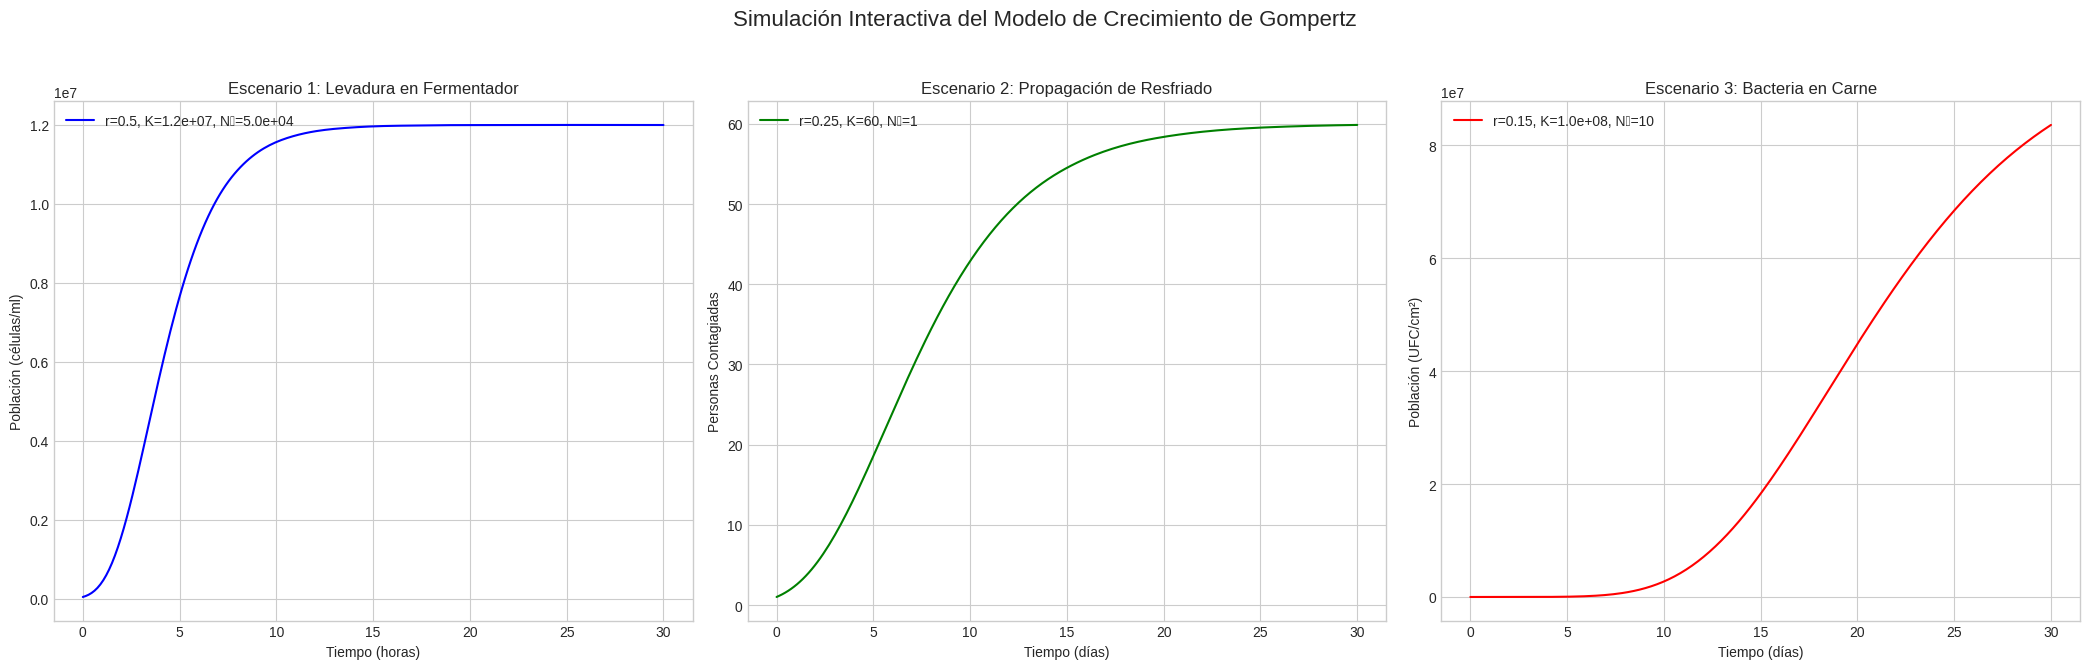

In [6]:
# Celda final para el reporte estático en GitHub
# Se llama a la función con los parámetros fijos de los 3 escenarios.

plot_gompertz_scenarios(
    # Escenario 1: Levadura
    r1=0.5, K1=1.2e7, N01=5e4,
    # Escenario 2: Resfriado
    r2=0.25, K2=60, N02=1,
    # Escenario 3: Bacteria en Carne
    r3=0.15, K3=1e8, N03=10
)